In [223]:
#import csv
import pandas as pd


In [224]:
#%pip install pandas

In [225]:
df_train = pd.read_csv('./data/train_set.csv')
df_test = pd.read_csv('./data/test_set.csv')

In [226]:
df_train.columns

Index(['phone_number', 'name', 'full_address', 'latitude', 'longitude',
       'review_count', 'rating', 'website', 'types', 'city', 'verified',
       'country', 'country_corrected', 'open_info', 'cluster_type',
       'distance_to_centroid'],
      dtype='object')

In [227]:
df_train.head()

,phone_number,name,full_address,latitude,longitude,review_count,rating,website,types,city,verified,country,country_corrected,open_info,cluster_type,distance_to_centroid
0,0,Hotel am Kornmarkt GmbH,1,50.116323,8.694880,32.0,4.4,0,Hotel,Frankfurt,False,Germany,Germany,0,132,0.301253
1,1,Amusement park TERRALTITUDE,1,49.989875,4.699309,606.0,4.6,1,"Amusement park, Tourist attraction",Fumay,True,France,France,0,22,0.368996
2,1,Trust E Store Dubai,1,25.274980,55.319172,2.0,5.0,1,Electronics store,Dubai,True,United Arab Emirates,United Arab Emirates,1,17,0.293268
3,1,The Bristol Inn Hotel,1,25.273519,55.322777,87.0,3.9,1,Hotel,Dubai,True,United Arab Emirates,United Arab Emirates,0,132,0.293264
4,1,Magic Planet City Centre Al Zahia,1,25.315866,55.454474,198.0,4.2,1,"Amusement park, Amusement center, Children's a...",Sharjah,True,United Arab Emirates,United Arab Emirates,1,22,0.294698


In [228]:
#show how many countries are there which have Unknown label

df_train[df_train['country_corrected']=='Unknown'].shape

(29, 16)

In [229]:
%pip install ratelimiter

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [230]:
%pip install reverse_geocoder

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [231]:
#for each country_corrected row which has value "Unknown" run geopy and basing on longitude and latitude, assign en name of country
import reverse_geocoder as rg

def get_country(row):
    if row['country_corrected'] == 'Unknown':
        location = rg.search((row['latitude'], row['longitude']))
        return location[0]['cc']
    else:
        return row['country_corrected']

df_train['country_corrected'] = df_train.apply(get_country, axis=1)
        


In [232]:
df_train[df_train['country_corrected']=='Unknown'].shape

(0, 16)

In [233]:


#drop following columns but save them in another dataframe: name, full_adress,types, city, country,country_corrected
df_train_dropped = df_train[['name',  'types', 'city', 'country', 'country_corrected']].copy()
df_train = df_train.drop(['name',  'types', 'city', 'country', 'country_corrected'], axis=1)




In [234]:
df_train.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,cluster_type,distance_to_centroid
0,0,1,50.116323,8.694880,32.0,4.4,0,False,0,132,0.301253
1,1,1,49.989875,4.699309,606.0,4.6,1,True,0,22,0.368996
2,1,1,25.274980,55.319172,2.0,5.0,1,True,1,17,0.293268
3,1,1,25.273519,55.322777,87.0,3.9,1,True,0,132,0.293264
4,1,1,25.315866,55.454474,198.0,4.2,1,True,1,22,0.294698


In [235]:
df_dummies = pd.get_dummies(df_train['cluster_type'], drop_first=True)
X = df_dummies.values

In [236]:
X.shape

(9118, 317)

In [237]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

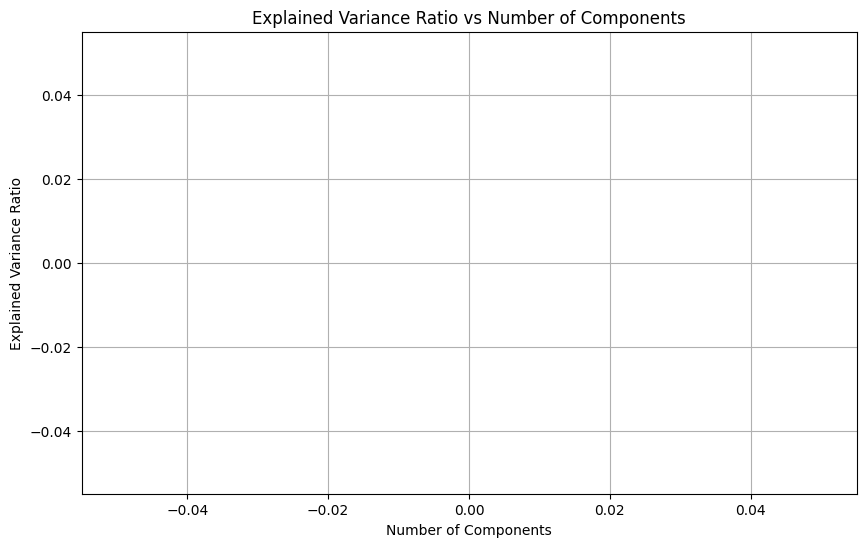

In [238]:
def explained_variance(n_components, X):
    pca = PCA(n_components=n_components)
    pca.fit(df_train)
    return pca.explained_variance_ratio_.sum()

# Range of n_components to test
components_range = list(range(2, df_train.shape[1]-11, 10))
explained_variances = []

# Calculate explained variance for each number of components
for n in components_range:
    explained_variances.append(explained_variance(n, X))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variances, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

In [239]:
import numpy as np

In [240]:
#do dummy on cluster_type, PCA n=100
pca = PCA(n_components=50)
pca.fit(X)

#drop type_cluster from df_train_scaled and add PCA components. But I want it in dataframe
df_pca = pd.DataFrame(pca.transform(X))
df_train = df_train.drop(['cluster_type'], axis=1)
df_train_scaled = pd.concat([df_train, df_pca], axis=1)

df_train_scaled.head()


,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,distance_to_centroid,...,40,41,42,43,44,45,46,47,48,49
0,0,1,50.116323,8.694880,32.0,4.4,0,False,0,0.301253,...,0.000362,0.003434,0.000123,0.000004,0.000385,-0.000774,-0.001703,-0.001133,-0.000149,-0.000348
1,1,1,49.989875,4.699309,606.0,4.6,1,True,0,0.368996,...,-0.003277,-0.208063,-0.056873,-0.107256,-0.264115,0.785548,-0.329357,-0.190306,-0.175886,0.019685
2,1,1,25.274980,55.319172,2.0,5.0,1,True,1,0.293268,...,0.001881,0.019410,0.000439,-0.000008,0.002261,-0.003895,-0.008561,-0.005564,-0.001327,-0.001764
3,1,1,25.273519,55.322777,87.0,3.9,1,True,0,0.293264,...,0.000362,0.003434,0.000123,0.000004,0.000385,-0.000774,-0.001703,-0.001133,-0.000149,-0.000348
4,1,1,25.315866,55.454474,198.0,4.2,1,True,1,0.294698,...,-0.003277,-0.208063,-0.056873,-0.107256,-0.264115,0.785548,-0.329357,-0.190306,-0.175886,0.019685


In [241]:
#via sklearn prepare standarizer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns)

In [242]:
df_train_scaled.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,distance_to_centroid
0,-2.166018,0.154658,1.393429,-0.313001,-0.427900,0.170778,-1.197252,-1.493667,-1.588882,-0.407476
1,0.461677,0.154658,1.383070,-0.391986,1.625489,0.464637,0.835246,0.669493,-1.588882,-0.193557
2,0.461677,0.154658,-0.641643,0.608670,-0.535220,1.052354,0.835246,0.669493,0.629373,-0.432689
3,0.461677,0.154658,-0.641762,0.608741,-0.231146,-0.563868,0.835246,0.669493,-1.588882,-0.432703
4,0.461677,0.154658,-0.638293,0.611345,0.165938,-0.123080,0.835246,0.669493,0.629373,-0.428175


In [243]:
df_train_scaled.columns = df_train_scaled.columns.astype(str) 

### Jak dobrać $\texttt{minPts}$ oraz $\varepsilon$?

Autorzy pracy wprowadzającej DBSCAN proponują następującą metodę wyboru odpowiednich wartości $\texttt{minPts}$ oraz $\varepsilon$:
1. Ustaw $\texttt{minPts}$ na podwojony wymiar danych (np. dla danych dwuwymiarowych $\texttt{minPts}=4$).
2. Dla każdego punktu oblicz odległość do $(\texttt{minPts} − 1)$ najbliższego sąsiada (różnego od ustalonego punktu).
3. Otrzymane odległości od największej i przedstaw na wykresie: na osi $x$ znajdują się numery punktów (po sortowaniu), a na osi $y$ odległości tych punktów od najbliższych sąsiadów.
4. Obserwacje po lewej stronie wykresu znajdują się daleko od swoich sąsiadów, więc można uznać że są odstające. Znajdź ostatni 'duży skok' (lub łokieć) na wykresie i wybierz wartość odległości jako $\varepsilon$. Obserwacje po lewej stronie tego skoku będą zaklasyfikowane jako odstające a na prawo trafią do klastrów. 

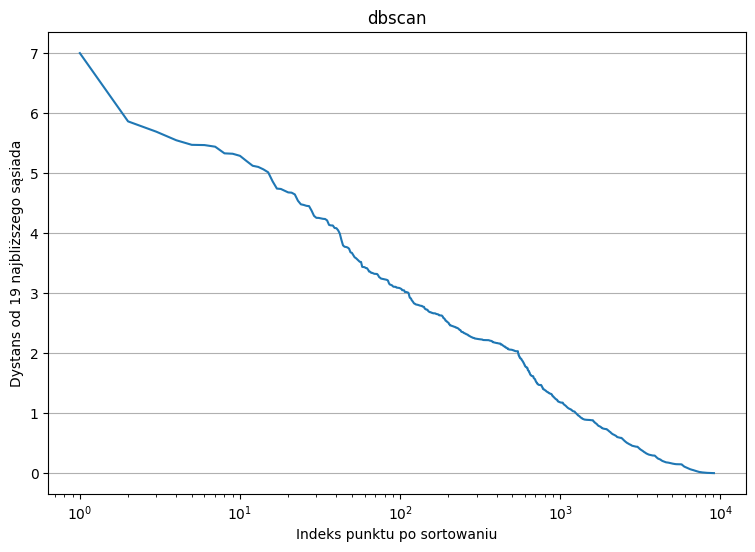

In [244]:
import sklearn.neighbors
import matplotlib.pyplot as plt

# Ustalamy minPts na podwojony wymiar danych
minPts = 2 * df_train_scaled.shape[1]
#minPts = 1 * df_train_scaled.shape[1]

# Obliczamy odległości do (minPts - 1) najbliższego sąsiada
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df_train_scaled)
distances, indices = nbrs.kneighbors(df_train_scaled)

# Sortujemy odległości od największej do najmniejszej
distanceDec = sorted(distances[:,minPts-1], reverse=True)

# Rysujemy wykres
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel(f'Dystans od {minPts-1} najbliższego sąsiada')
ax1.plot(list(range(1,df_train_scaled.shape[0]+1)), distanceDec)
plt.title('dbscan')
plt.xscale('log')
plt.grid(axis='y')

plt.show()

In [245]:
#prepare DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2 * df_train_scaled.shape[1])
dbscan.fit(df_train_scaled)
df_train_scaled['dbscam_cluster'] = dbscan.labels_



In [246]:
df_train_scaled['dbscam_cluster'].value_counts()

dbscam_cluster
 1     2031
 7     1074
 12     944
-1      799
 5      629
 3      578
 4      464
 13     340
 6      209
 14     173
 9      160
 27     149
 24     131
 2      125
 19     113
 0       98
 11      90
 8       80
 17      78
 23      72
 36      57
 26      51
 21      47
 16      45
 18      45
 35      44
 10      44
 22      42
 33      42
 30      41
 29      36
 20      35
 31      32
 34      31
 32      28
 25      27
 28      26
 38      26
 15      23
 37      23
 39      22
 40      14
Name: count, dtype: int64

In [247]:
%pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [248]:
import hdbscan

# Ustalamy min_cluster_size na podwojony wymiar danych
min_cluster_size = 2 * df_train_scaled.shape[1]

# Dopasowujemy model HDBSCAN do naszych danych
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
cluster_labels = clusterer.fit_predict(df_train_scaled)

# Wyświetlamy etykiety klastrów
df_train_scaled['hdbscam_cluster'] = cluster_labels

print(cluster_labels)

[53 -1 88 ...  3 61 68]


In [249]:
#summarize the results
df_train_scaled['hdbscam_cluster'].value_counts()

hdbscam_cluster
-1     2895
 28     629
 88     269
 57     210
 48     194
       ... 
 77      24
 29      24
 23      23
 2       23
 71      22
Name: count, Length: 90, dtype: int64

In [250]:
#copy df_train_scaled dbscam_cluster to df_train
df_train['hdbscam_cluster'] = df_train_scaled['hdbscam_cluster']
df_train['dbscam_cluster'] = df_train_scaled['dbscam_cluster']

In [251]:
df_train.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,distance_to_centroid,hdbscam_cluster,dbscam_cluster
0,0,1,50.116323,8.694880,32.0,4.4,0,False,0,0.301253,53,0
1,1,1,49.989875,4.699309,606.0,4.6,1,True,0,0.368996,-1,6
2,1,1,25.274980,55.319172,2.0,5.0,1,True,1,0.293268,88,1
3,1,1,25.273519,55.322777,87.0,3.9,1,True,0,0.293264,54,2
4,1,1,25.315866,55.454474,198.0,4.2,1,True,1,0.294698,-1,1


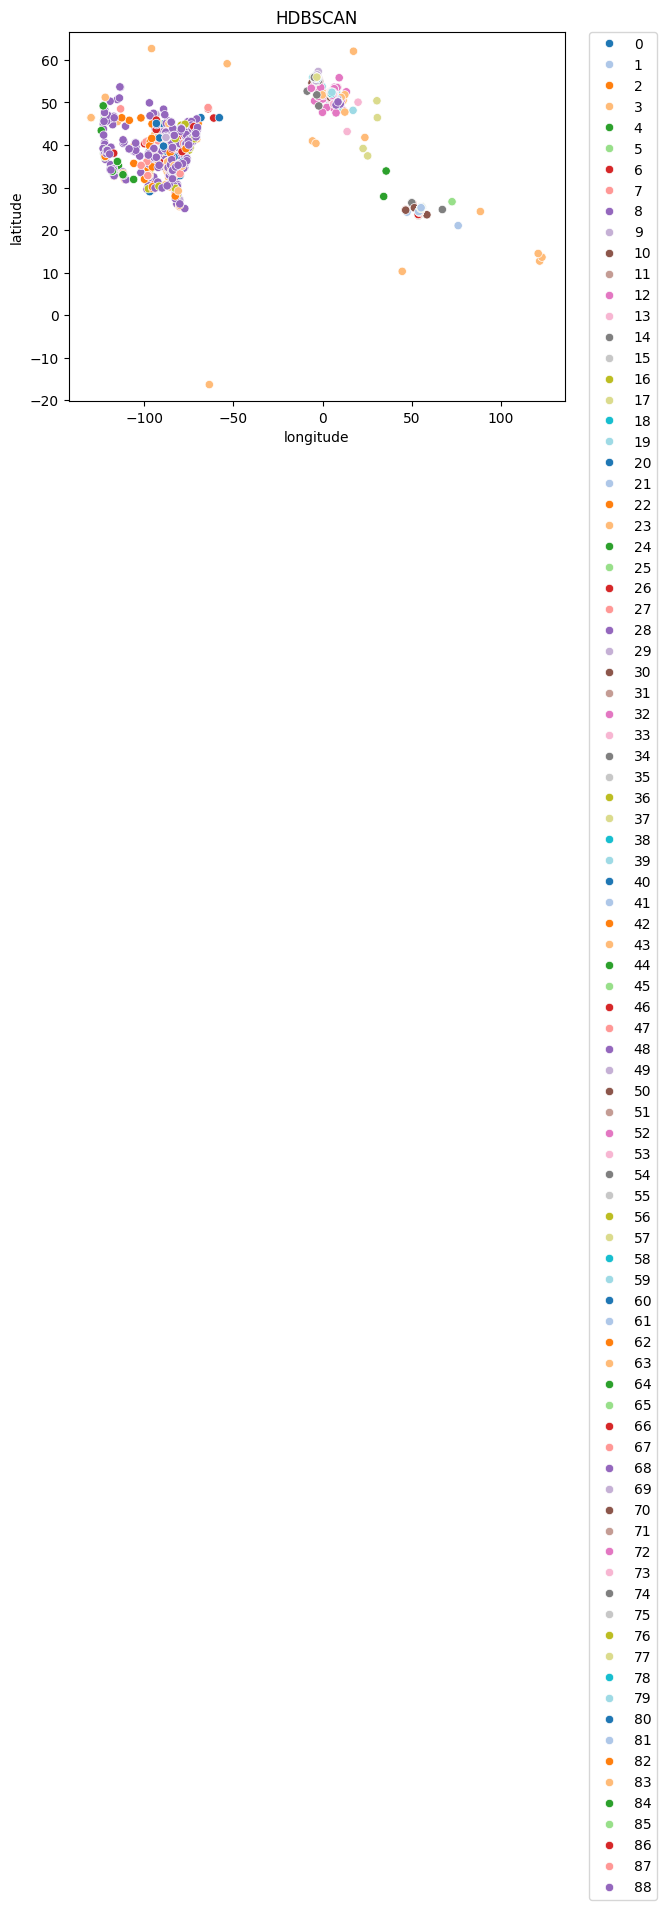

In [252]:


#visualize the dbscan results on plot, but do not show -1
import seaborn as sns

sns.scatterplot(data=df_train[df_train['hdbscam_cluster']!=-1], y='latitude', x='longitude',hue='hdbscam_cluster',  palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('HDBSCAN')
plt.show()





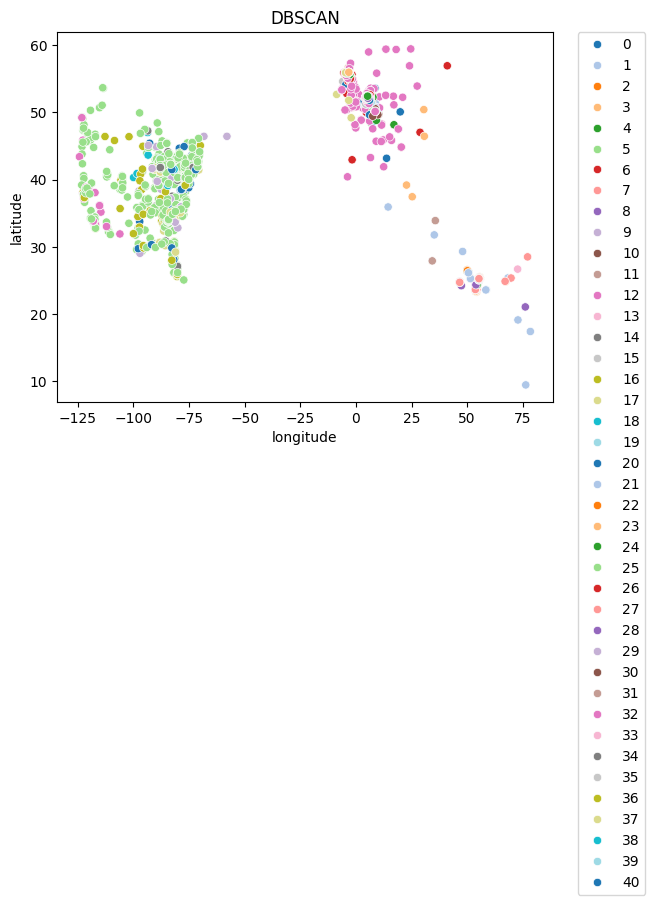

In [253]:


#visualize the dbscan results on plot, but do not show -1
import seaborn as sns

sns.scatterplot(data=df_train[df_train['dbscam_cluster']!=-1], y='latitude', x='longitude',hue='dbscam_cluster',  palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('DBSCAN')
plt.show()





In [254]:
#do pca on df_train_scaled


In [255]:
#show the explained variance

